In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-police-shootings/fatal-police-shootings-data.csv


# Gather the data

In [2]:
df = pd.read_csv('../input/data-police-shootings/fatal-police-shootings-data.csv')

In [3]:
df

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5411,5921,William Slyter,2020-06-13,shot,gun,22.0,M,W,Kansas City,MO,False,other,Other,False
5412,5922,TK TK,2020-06-13,shot,undetermined,NaN,M,NaN,San Bernardino,CA,False,attack,Not fleeing,False
5413,5924,Nicholas Hirsh,2020-06-15,shot,gun,31.0,M,W,Lawrence,KS,False,attack,Car,False
5414,5926,TK TK,2020-06-16,shot,gun,24.0,M,NaN,Beach Park,IL,False,attack,Not fleeing,False


In [4]:
df.head(20)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
5,11,Kenneth Joe Brown,2015-01-04,shot,gun,18.0,M,W,Guthrie,OK,False,attack,Not fleeing,False
6,13,Kenneth Arnold Buck,2015-01-05,shot,gun,22.0,M,H,Chandler,AZ,False,attack,Car,False
7,15,Brock Nichols,2015-01-06,shot,gun,35.0,M,W,Assaria,KS,False,attack,Not fleeing,False
8,16,Autumn Steele,2015-01-06,shot,unarmed,34.0,F,W,Burlington,IA,False,other,Not fleeing,True
9,17,Leslie Sapp III,2015-01-06,shot,toy weapon,47.0,M,B,Knoxville,PA,False,attack,Not fleeing,False


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5416 entries, 0 to 5415
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       5416 non-null   int64  
 1   name                     5416 non-null   object 
 2   date                     5416 non-null   object 
 3   manner_of_death          5416 non-null   object 
 4   armed                    5189 non-null   object 
 5   age                      5181 non-null   float64
 6   gender                   5414 non-null   object 
 7   race                     4895 non-null   object 
 8   city                     5416 non-null   object 
 9   state                    5416 non-null   object 
 10  signs_of_mental_illness  5416 non-null   bool   
 11  threat_level             5416 non-null   object 
 12  flee                     5167 non-null   object 
 13  body_camera              5416 non-null   bool   
dtypes: bool(2), float64(1), 

In [6]:
df.tail(10)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
5406,5914,Mason James Lira,2020-06-11,shot,gun,26.0,M,W,Paso Robles,CA,True,attack,Foot,False
5407,5915,Michael Thomas,2020-06-11,shot,undetermined,62.0,M,B,Lancaster,CA,False,undetermined,Not fleeing,False
5408,5916,Rayshard Brooks,2020-06-12,shot,Taser,27.0,M,B,Atlanta,GA,False,attack,Foot,True
5409,5925,Caine Van Pelt,2020-06-12,shot,gun,23.0,M,B,Crown Point,IN,False,attack,Car,False
5410,5918,Hannah Fizer,2020-06-13,shot,unarmed,25.0,F,W,Sedalia,MO,False,other,Not fleeing,False
5411,5921,William Slyter,2020-06-13,shot,gun,22.0,M,W,Kansas City,MO,False,other,Other,False
5412,5922,TK TK,2020-06-13,shot,undetermined,NaN,M,NaN,San Bernardino,CA,False,attack,Not fleeing,False
5413,5924,Nicholas Hirsh,2020-06-15,shot,gun,31.0,M,W,Lawrence,KS,False,attack,Car,False
5414,5926,TK TK,2020-06-16,shot,gun,24.0,M,NaN,Beach Park,IL,False,attack,Not fleeing,False
5415,5927,TK TK,2020-06-16,shot,gun,27.0,M,NaN,Phoenix,AZ,False,attack,Not fleeing,False


* According to the data, most of the individuals manner of death was shot

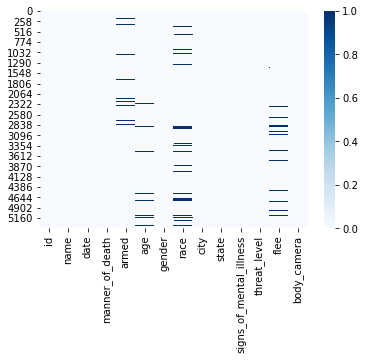

In [7]:
import seaborn as sns
sns.heatmap(df.isnull(), cmap="Blues")

* As you can see, we have a lot of missing data from each column

In [8]:
df.isnull().mean() * 100

id                         0.000000
name                       0.000000
date                       0.000000
manner_of_death            0.000000
armed                      4.191285
age                        4.338996
gender                     0.036928
race                       9.619645
city                       0.000000
state                      0.000000
signs_of_mental_illness    0.000000
threat_level               0.000000
flee                       4.597489
body_camera                0.000000
dtype: float64

In [9]:
df.dropna(inplace=True)

# Now we can analyze our clean data set

In [10]:
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [11]:
df['body_camera'].value_counts()

False    3869
True      530
Name: body_camera, dtype: int64

* Majority of the officers were not wearing body cameras time of incident.

In [12]:
df['armed'].value_counts()

gun                2596
knife               660
unarmed             336
toy weapon          165
vehicle             117
                   ... 
hand torch            1
nail gun              1
garden tool           1
metal hand tool       1
bean-bag gun          1
Name: armed, Length: 90, dtype: int64

* the choice of weapon was a gun do to use on the indivudals 

In [13]:
df['race'].value_counts()

W    2253
B    1164
H     786
A      83
N      70
O      43
Name: race, dtype: int64

In [15]:
df['age'].value_counts()

25.0    160
31.0    158
27.0    152
33.0    149
29.0    149
       ... 
79.0      1
12.0      1
13.0      1
78.0      1
91.0      1
Name: age, Length: 75, dtype: int64

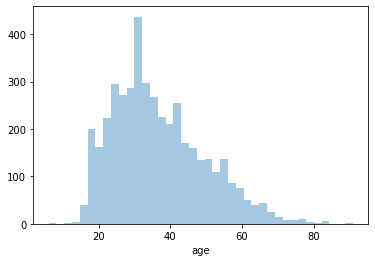

In [18]:
sns.distplot(df['age'], kde=False)

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

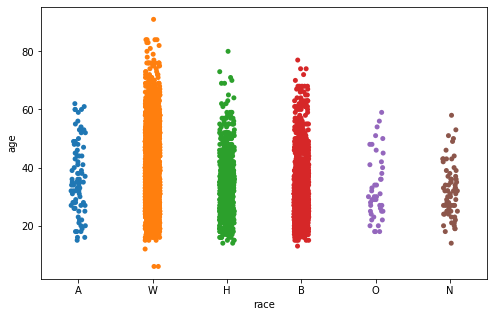

In [28]:
plt.figure(figsize=(8, 5))
sns.stripplot(x='race', y='age', data=df)

From the data shown, we can see that white people that are close to ages from 20 all the way up to 80 were more likely shot compared to all other races

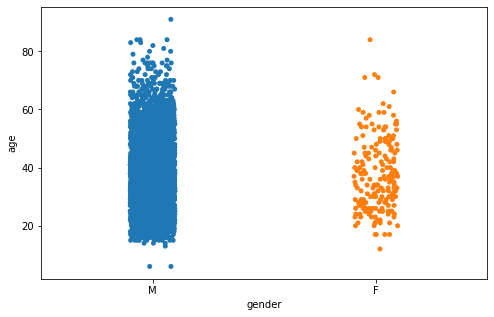

In [31]:
plt.figure(figsize=(8,5))
sns.stripplot(x='gender', y='age', data=df)

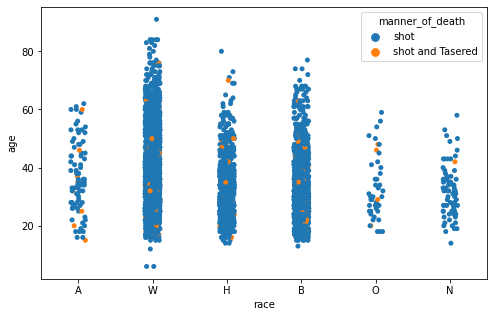

In [32]:
plt.figure(figsize=(8, 5))
sns.stripplot(x='race', y='age', data=df, hue='manner_of_death')

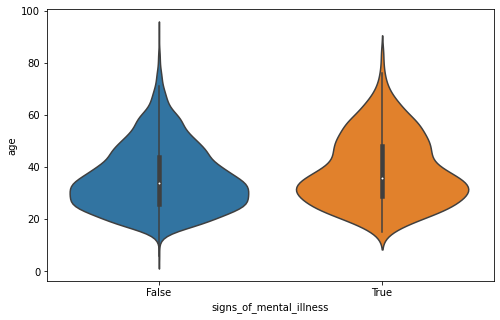

In [33]:
plt.figure(figsize=(8,5))
sns.violinplot(x='signs_of_mental_illness', y='age', data=df)

Variation of age vs mental illness

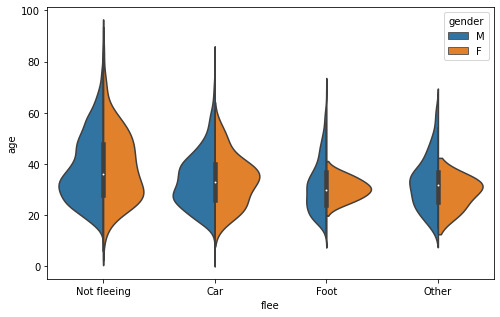

In [34]:
plt.figure(figsize=(8,5))
sns.violinplot(x='flee', y='age', data=df, hue='gender', split=True)

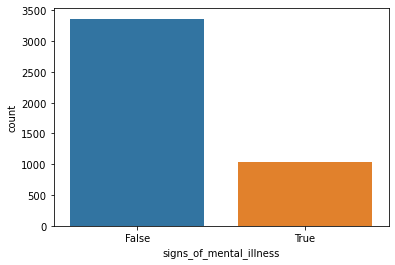

In [35]:
sns.countplot(x=df['signs_of_mental_illness'])

In [36]:
df['armed'].value_counts()

gun                2596
knife               660
unarmed             336
toy weapon          165
vehicle             117
                   ... 
hand torch            1
nail gun              1
garden tool           1
metal hand tool       1
bean-bag gun          1
Name: armed, Length: 90, dtype: int64

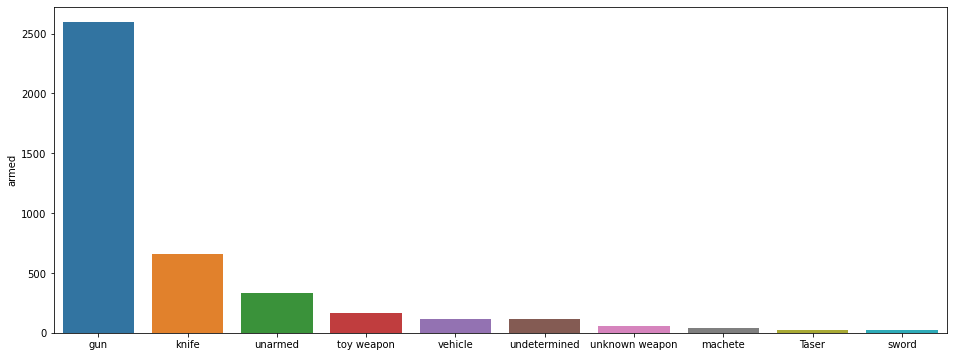

In [37]:
plt.figure(figsize=(16, 6))
sns.barplot(y=df['armed'].value_counts()[0:10], x=df['armed'].value_counts()[0:10].index)

In [38]:
df['manner_of_death'].value_counts()

shot                4169
shot and Tasered     230
Name: manner_of_death, dtype: int64

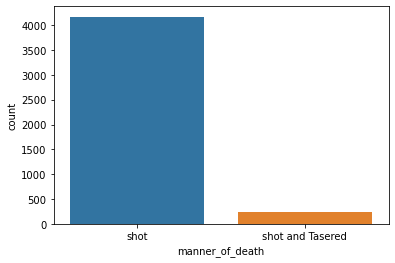

In [39]:
sns.countplot(x='manner_of_death', data=df)

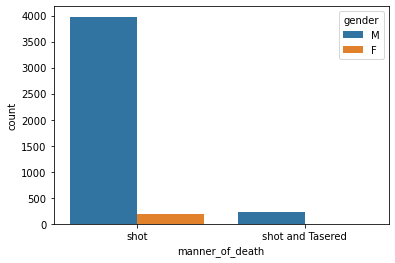

In [40]:
sns.countplot(x=df['manner_of_death'], hue=df['gender'])

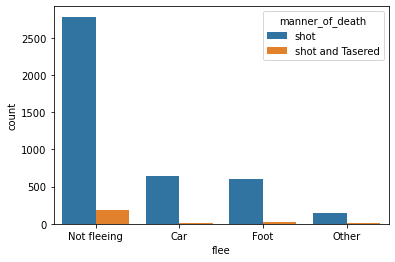

In [44]:
sns.countplot(x=df['flee'], hue=df['manner_of_death'])

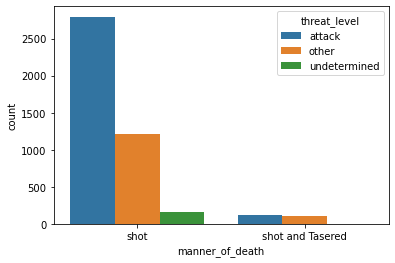

In [42]:
sns.countplot(x=df['manner_of_death'], hue=df['threat_level'])

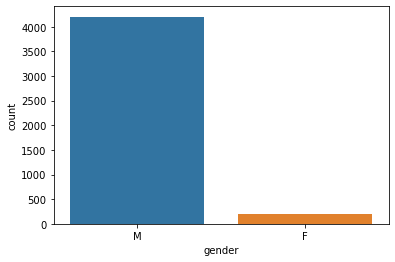

In [45]:
sns.countplot(x=df['gender'])

* Men do more crimes compared to females

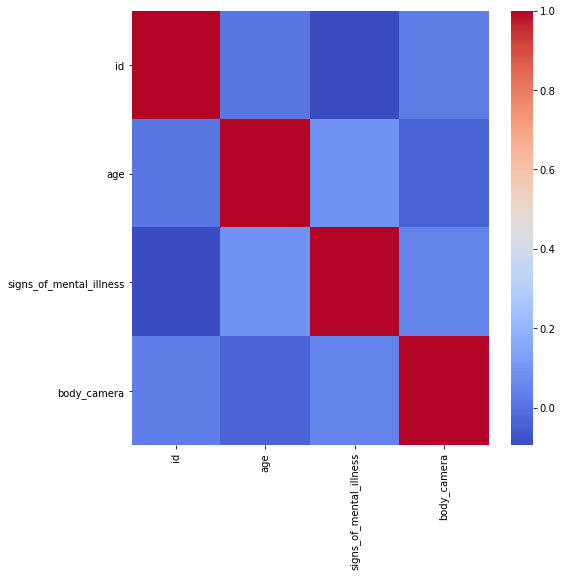

In [47]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), cmap='coolwarm')

# States and City

In [49]:
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [51]:
df['state'].value_counts()

CA    623
TX    383
FL    294
AZ    200
CO    153
GA    146
NC    137
OK    137
OH    133
TN    114
WA    113
MO    112
IL     88
LA     87
IN     87
PA     86
NY     85
VA     85
AL     85
WI     82
NM     81
NV     76
KY     73
SC     71
MI     67
OR     67
MD     66
AR     64
MN     56
UT     54
NJ     52
MS     52
KS     46
WV     37
ID     34
AK     33
MA     30
IA     29
HI     23
MT     22
NE     22
ME     17
CT     17
WY     13
DC     13
SD     13
NH     12
ND     10
DE      9
VT      8
RI      2
Name: state, dtype: int64

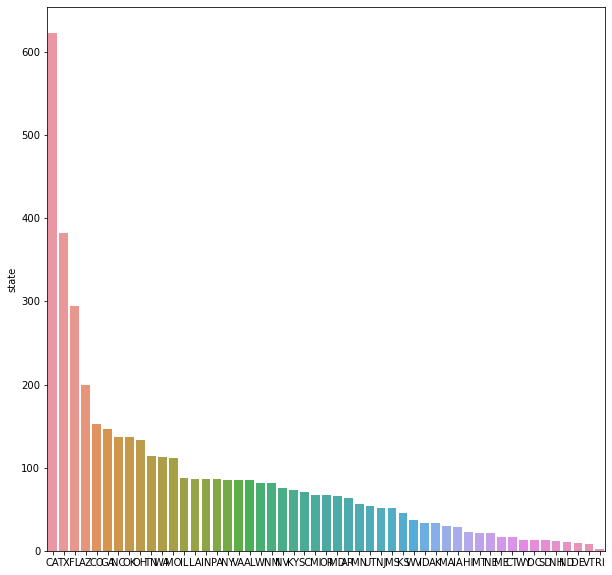

In [53]:
plt.figure(figsize=(10,10))
sns.barplot(x=df['state'].value_counts().index, y=df['state'].value_counts())

* In California, there is a higher crime rate compared to all of the other states

In [54]:
df['city'].value_counts()

Los Angeles    62
Phoenix        60
Houston        45
Las Vegas      38
San Antonio    34
               ..
Reagan          1
Brick           1
Blue Summit     1
Stamford        1
Inwood          1
Name: city, Length: 2116, dtype: int64

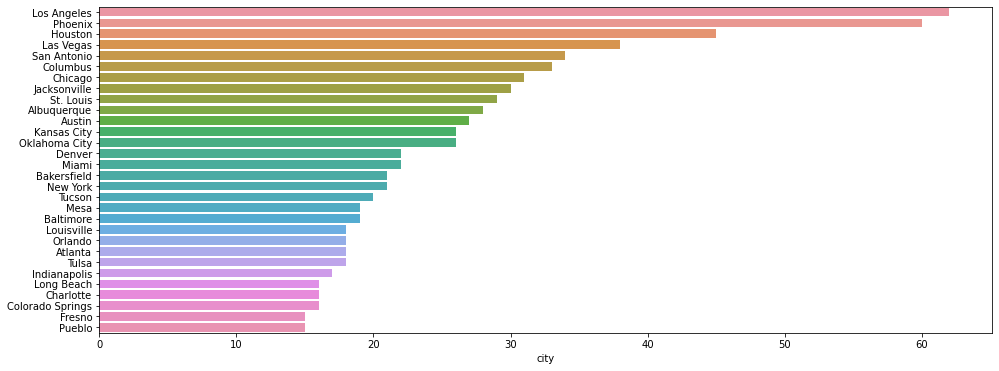

In [55]:
plt.figure(figsize=(16,6))
sns.barplot(x=df['city'].value_counts()[0:30], y=df['city'].value_counts()[0:30].index)

* Los Angeles CA has the most crime rate in california 